![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **HOW TO MAKE A TWO-AXIS FOR FINANCIAL ASSETS?**

## **Bar chart and line chart together**

<font size="3"> Sometimes it is very useful to plot different quantities in one single chart that has two axis. For example, if we would like to plot the net income of a company using a bar chart and the evolution of the stock's price using a line chart, we can use a single chart a put both information together.<br><br> 
    
<font size="3"> In this notebook we will use Yahoo Finance Data for to get Amazon's stock prices and the Edgar API to get Amazon's financial statements.  If you want to know how to download the data from the yahoo finance API please take a look  <a href="https://quant-trading.co/how-to-download-data-from-yahoo-finance-api/" target="_blank">here</a>. If you want to know how to download the data from the SEC EDGAR API please take a look  <a href="https://quant-trading.co/how-to-download-data-from-sec-edgar-api/" target="_blank">here</a>
<br><br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, PercentFormatter
import matplotlib.dates as mdates
formatter = mdates.DateFormatter("%Y-%m")
import matplotlib.ticker as ticker
import requests
import json

## **Download the data from the SEC EDGAR API**

<font size="3"> We show a summary for Amazon in the script below. Remember that we showed all the details in this <a href="https://quant-trading.co/how-to-download-data-from-sec-edgar-api/" target="_blank">Notebook</a>
<br><br>

In [2]:
#CIK

CIK = '0001018724' #-> Amazon

headers = { 'User-Agent': 'Mozilla/5.0', } 
download = requests.get('https://data.sec.gov/api/xbrl/companyfacts/CIK'+CIK+'.json', stream=True, headers = headers)
fin_statment = download.json()
us_gaap_concepts = list(fin_statment['facts']['us-gaap'].keys())
acc_id = 'NetIncomeLoss'
fin_statment_list = fin_statment['facts']['us-gaap'][acc_id]['units']['USD']
fin_statment_df = pd.DataFrame(fin_statment_list)


fin_statment_df['start'] = pd.to_datetime(fin_statment_df['start'], format="%Y-%m-%d")
fin_statment_df['end'] = pd.to_datetime(fin_statment_df['end'], format="%Y-%m-%d")
fin_statment_df['days'] = (fin_statment_df['end']-fin_statment_df['start']).dt.days

filtered_account = fin_statment_df.dropna()
filtered_account = filtered_account[filtered_account['frame'].str.contains('CY')]

for i in range(3,filtered_account.shape[0]):
    if filtered_account['days'].iloc[i]>100:
        filtered_account['val'].iloc[i] = filtered_account['val'].iloc[i]-filtered_account['val'].iloc[i-1]-filtered_account['val'].iloc[i-2]-filtered_account['val'].iloc[i-3]
        filtered_account['days'].iloc[i]=99


filtered_account = filtered_account[filtered_account['days']<100]

final_df = filtered_account[['end','val']]
final_df.drop_duplicates(inplace=True)
final_df

,end,val
3,2008-06-30,158000000
6,2008-09-30,118000000
8,2008-12-31,-107000000
11,2009-03-31,177000000
18,2009-06-30,142000000
...,...,...
359,2022-12-31,278000000
361,2023-03-31,3172000000
364,2023-06-30,6750000000
367,2023-09-30,9879000000


## **Download the data from YAHOO FINANCE API**

<font size="3"> We do as usual in the script below.
<br><br>

In [6]:
Ticker = 'AMZN'
my_ticker = yf.Ticker(Ticker)

#DATES
start_date = datetime.datetime(2007, 12, 31)
end_date = datetime.datetime(2024, 4, 15)

prices_hist = my_ticker.history(start=start_date,end=end_date)
prices_hist.reset_index(inplace=True)
prices_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2007-12-31,4.690500,4.718500,4.622500,4.632000,115104000,0,0.0
1,2008-01-02,4.767500,4.871500,4.735000,4.812500,277174000,0,0.0
2,2008-01-03,4.803000,4.862500,4.726000,4.760500,182450000,0,0.0
3,2008-01-04,4.663000,4.670000,4.425000,4.439500,205400000,0,0.0
4,2008-01-07,4.431000,4.528500,4.273500,4.441000,199632000,0,0.0
...,...,...,...,...,...,...,...,...
4094,2024-04-08,186.899994,187.289993,184.809998,185.190002,39221300,0,0.0
4095,2024-04-09,187.240005,187.339996,184.199997,185.669998,36546900,0,0.0
4096,2024-04-10,182.770004,186.270004,182.669998,185.949997,35879200,0,0.0
4097,2024-04-11,186.740005,189.770004,185.509995,189.050003,40020700,0,0.0


## **Calculate max and min changes**

In [4]:
#Y-AXIS MAX AND MIN VALUES  
min_value = prices_hist['Close'].min()
max_value = prices_hist['Close'].max()
my_range = max_value - min_value

## **Create the bar chart plus the line chart**

   
<font size="3"> We will use the bar function of the matplotlib library to plot the net income. We will also use the plot function for the line or scatter chart to plot the stock's price. Below you can find an example on how to do that.
<br><br>

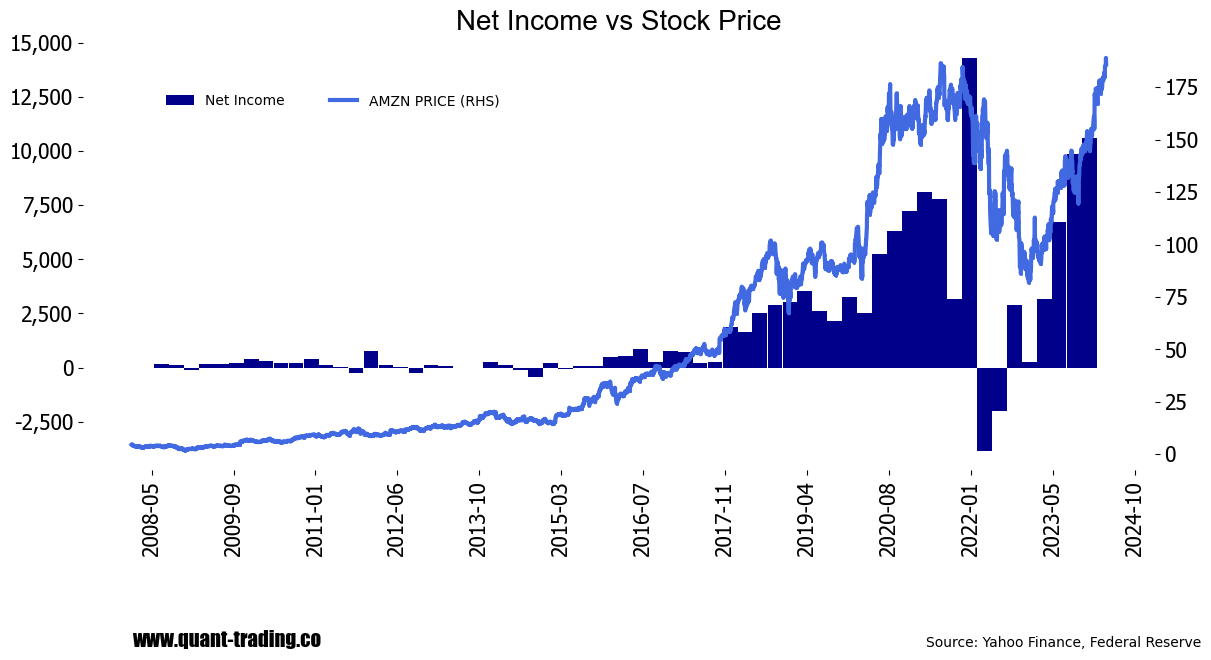

In [5]:
fig = plt.figure()

tick_spacing1 = 365
tick_spacing2 = 500

ax1 = fig.add_subplot(1, 1, 1,frameon=False)
ax1.bar(filtered_account['end'],filtered_account['val']/1000000,color='darkblue', width=np.timedelta64(24*90, 'h'),label='Net Income')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
ax1.legend(frameon=False,loc=1, bbox_to_anchor=(0.2, 0.9),ncol=2,markerscale=1)
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.axis([None, None, None, None])
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:'{:,.0f}'.format(y)))

ax1.xaxis.set_major_formatter(formatter)
plt.title("Net Income vs Stock Price", size=20, family='Arial')


ax2 = ax1.twinx()  #duplicate the axis and then format it
ax2.plot(prices_hist['Date'],prices_hist['Close'],marker='o',linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label=Ticker+' PRICE (RHS)',markersize=1)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing2))
ax2.legend(frameon=False, loc=1, bbox_to_anchor=(0.4, 0.9),ncol=2,markerscale=1)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([None, None, None, None])
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.xaxis.set_major_formatter(formatter)
ax2.set_facecolor('white')
plt.box(on=None)

ax2.text(start_date, (min_value-my_range/2),'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
ax2.text(end_date - datetime.timedelta(1100), (min_value-my_range/2),'Source: Yahoo Finance, Federal Reserve' , color='black', fontsize=10)

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

If this content is helpful and you want to make a donation please click on the button below. It helps us maintain this site.

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)